#### Brittany Ahn

**Date:** September 6, 2024

**Course:** CASMA665 Mathematical Neuroscience

**Assignment:** Independently working

**Descr:** Playing with toy single compartment INF and LIF models

**Resources:** Integrate Fire Neuron module at 
https://mark-kramer.github.io/BU-MA665-MA666/IF.html

**Fun stuff:** Theoretical Neuroscience textbook by Dayan and Abbott

Section 5.4: INF Models (Pg. 162-165)

https://boulderschool.yale.edu/sites/default/files/files/DayanAbbott.pdf


___


### INF Model

**Eq1: Law of conservation of current.** The capacitive & resistive currents must equal the external (i.e. injected) current.

C * dV/dt = I

**Rewrite:**

dV/dt = I/C

**Find numerical solution**

V(t+1) = V(t) + dt*(I/C)

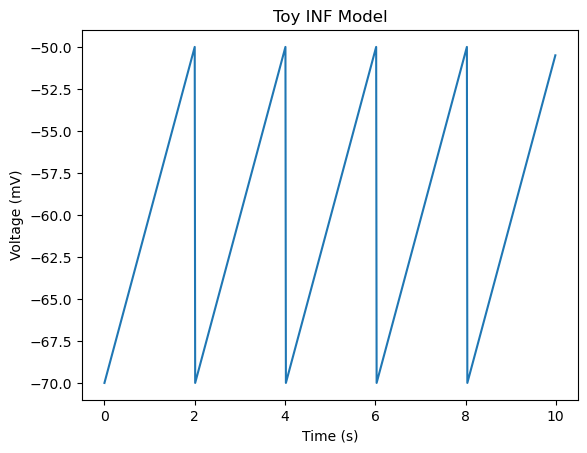

In [77]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define constants
C=0.1                   # capcitance created by cell membrane which acts as an insulator that separates intra/extracellular charge
I=1.0                   # current
dt=0.01                 # time step
Vth=-50                 # threshold voltage
Vreset=-70              # reset voltage
V = np.zeros([1000,1])  # initialize voltage array; 1000 rows, 1 col
V[0]=-70                # initial val of V

# Compute voltages using INF single-compartment equation
for i in range(0,999):
    V[i+1] = V[i] + dt*(I/C)
    if V[i+1]>Vth:      # reset voltage if above threshold
        V[i+1]=Vreset

# Create an array of times (x-axis)
t = np.arange(0, len(V))*dt

# Plot
plt.figure()
plt.plot(t,V)
plt.title("Toy INF Model")
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()


___

### LIF Model

C * dV/dt = -im + I for im = gL(V - EL)

**LHS:** membrane capacitance times the rate of change of membrane potential

**RHS:** sum of currents

**Variables**

C --- membrane capacitance

V  --- voltage

t  --- time

im --- "membrane current" (accounts for "leaky channel")

gL --- leak conductance (gL = 1/R)

EL --- equilibrium potential of leak

I  --- external input current (i.e. injected current)

Note: If V(t) = threshold voltage, then V(t + dt) = EL (fire, then reset to EL)

---

**Find a numerical solution:**

C * dV/dt = -gL(V-EL) + I

dV/dt = (-gL(V-EL) + I)*(1/C)

Let dV = V(t+1) - V(t)

Then V(t+1) = (-gL(V-EL) + I)*(dt/C) + V(t)

---

### **Question:** How does LIF differ from INF model?

In the LIF, we define a "leaky channel".
The leaky channel has a conductance (gL) and is dependent on the voltage V. Note: voltage V(t) is still dependent on time.

Note the +/- in the equation as direction of current

**INF:** Cm * dV/dt = I

**LIF:** Cm * dV/dt = -gL(V - EL) + I

**Comparisons:** Both INF and LIF demonstrate the law of conservation of current s.t. LHS = RHS.

**Contrasts:** RHS LIF model is the **sum** of currents from (1) leak channel; (2) external current source (injected current). (recall -- sum of currents; i.e. models with multiple ion channels)


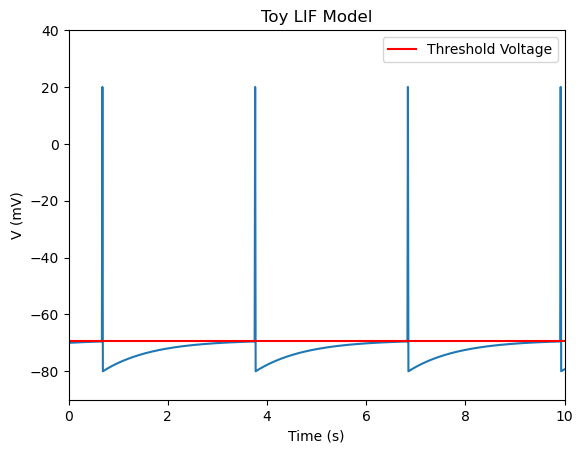

In [80]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define constants
C=1.0                   # capcitance
I=1.0                   # current
dt=0.01                 # time step (s)
Vth=-69.5               # threshold voltage
Vreset=-80              # reset voltage
gL=1                    # leak conductance
EL=-70                  # leak equilibrium
V = np.zeros([1000,1])  # initialize voltage array; 1000 rows, 1 col
V[0]=-70                # initial val of V
Vap=20                  # make it spike if past Vth ??

# Create voltage array with LIF model equation
for i in range(0,999):
    V[i+1] = (-gL*(V[i]-EL) + I)*(dt/C) + V[i]
    if V[i+1]>=Vth:      # if voltage surpasses threshold, then spike and reset voltage.
        V[i]=Vap         # spike ??
        V[i+1]=Vreset    # reset voltage

# Create an array of times
t = np.arange(0, len(V))*dt

# Plot
plt.figure()
plt.plot(t,V)
plt.title("Toy LIF Model")
plt.xlabel('Time (s)')
plt.ylabel('V (mV)')
plt.axhline(y = Vth, color = 'r', linestyle = '-', label='Threshold Voltage') # threshold voltage
legend = plt.legend(loc='upper right')
plt.xlim(0, t_sim)
plt.ylim(Vrest + (-20), Vap + 20)
plt.show()


___

### Toying with other equations

Can we write LIF in terms of tau?


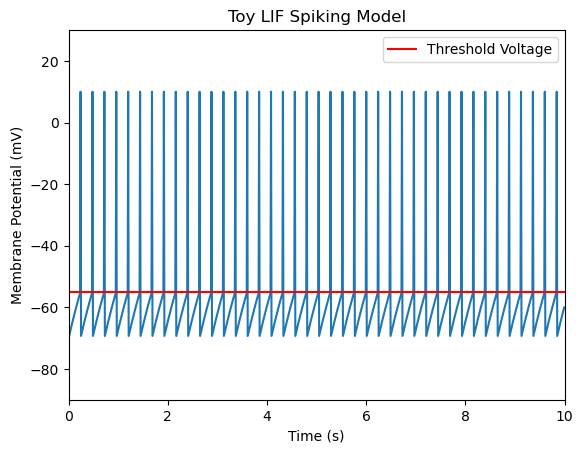

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
I = 1                 # injected current
tau = 1               # RC time constant
V = -70               # initial condition (mV)
Vrest = -70           # resting potential (mV)
Vth = -55             # threshold voltage (mV)
Vap = 10              # action potential voltage (mv)
refrac = 5            # length of refractory period
dt = 0.01             # integration timestep size
t_sim = 10            # length time of simulation (s)
v_values = []         # initialize voltage array

# Create an array of times. Note: When plotting, v_values.size == time_values.size
time_values = np.arange(0, t_sim, dt)

for t in time_values:
  if V >= Vth:             # if voltage >= threshold voltage, then spike and reset voltage
    v_values.append(Vap)   # spike
    V = Vrest              # reset
  else:                    # otherwise, append voltage to v_values
    v_values.append(V)
  V = V + dt*((I - V) / tau)

# Plot 
plt.plot(time_values, v_values)
plt.title("Toy LIF Spiking Model - RC Constant")
plt.xlabel("Time (s)")
plt.ylabel("Membrane Potential (mV)")
plt.axhline(y = Vth, color = 'r', linestyle = '-', label='Threshold Voltage') # threshold voltage
legend = plt.legend(loc='upper right')
plt.xlim(0, t_sim)
plt.ylim(Vrest + (-20), Vap + 20)
plt.show()
